Capstone 2 - Part 4 Modeling by Wesley Hall
In this section, we train and test models, then fit our data using various machine learning methods, including Random Forest Classifier,
KMeans Clustering, and Linear Regression. We look at how well the models work and use the best to make predictions.


We call our training and test data, but remembering that our 'ZipCode' column should be treated as a categorical feature rather than a numeric one. Let's handle this by excluding 'ZipCode' from the K-Means clustering and ensuring all other columns are numeric.

In [2]:
import pandas as pd

# Load the merged_data_with_pca dataset from the saved CSV file
merged_data_with_pca = pd.read_csv('merged_data_with_pca.csv')

# Check the first few rows to confirm the data is loaded correctly
print(merged_data_with_pca.head())


          BUSINESS NAME    ZIP CODE   NAICS LOCATION START DATE  \
0        SUSAN K TENNER  90034-6505  541600          01/01/2019   
1  ROBERT D KAMINSKI JR  90034-3001  541600          01/01/2019   
2          ANDREW LEVEY  90034-1816  541600          11/30/2019   
3         JOHANNES SAAM  90034-1612  541510          01/01/2019   
4          MELISSA SATO  90034-6108  541700          01/01/2019   

   LOCATION END DATE              LOCATION  \
0                NaN  (34.0189, -118.4195)   
1                NaN  (34.0252, -118.4194)   
2                NaN  (34.0392, -118.3954)   
3                NaN  (34.0404, -118.3733)   
4                NaN  (34.0182, -118.4185)   

                           PRIMARY NAICS DESCRIPTION  Pop 18-24 Some College  \
0  Management, scientific, & technical consulting...                -0.26269   
1  Management, scientific, & technical consulting...                -0.26269   
2  Management, scientific, & technical consulting...                -0.26269   


In [3]:
# Convert ZipCode to string before splitting
merged_data_with_pca['ZipCode'] = merged_data_with_pca['ZipCode'].astype(str)

# Remove the 4-digit extension and keep only the first 5 digits of the ZipCode
merged_data_with_pca['ZipCode'] = merged_data_with_pca['ZipCode'].str.split('-').str[0]

# Convert ZipCode back to integer (optional)
merged_data_with_pca['ZipCode'] = merged_data_with_pca['ZipCode'].astype(int)

# Verify the transformation
print(merged_data_with_pca[['ZipCode']].head())

   ZipCode
0    90034
1    90034
2    90034
3    90034
4    90034


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# Define the features (e.g., PCA components, ZipCode) and target (NAICS)
X = merged_data_with_pca.drop(columns=['NAICS', 'Year', 'BUSINESS NAME', 'LOCATION START DATE', 'LOCATION END DATE', 'PRIMARY NAICS DESCRIPTION', 'LOCATION'])
y = merged_data_with_pca['NAICS']

# Verify the features and target
print("Features (X):", X.columns)
print("Target (y):", y.head())

Features (X): Index(['ZIP CODE', 'Pop 18-24 Some College', 'Pop 18-24 Bachelors+',
       'Pop 25-34 HS+', 'Pop 25-34 Bachelors+', 'Pop 35-44 HS+',
       'Pop 35-44 Bachelors+', 'Pop 45-64 HS+', 'Pop 45-64 Bachelors+',
       'Pop 65+ HS+', 'Pop 65+ Bachelors+', 'ZipCode', 'PC1', 'PC2', 'PC3',
       'PC4', 'PC5'],
      dtype='object')
Target (y): 0    541600
1    541600
2    541600
3    541510
4    541700
Name: NAICS, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define features (X) and target (y)
X = merged_data_with_pca[['Pop 18-24 Some College', 'Pop 18-24 Bachelors+', 
                          'Pop 25-34 HS+', 'Pop 25-34 Bachelors+', 
                          'Pop 35-44 HS+', 'Pop 35-44 Bachelors+', 
                          'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 
                          'Pop 65+ HS+', 'Pop 65+ Bachelors+', 
                          'ZipCode', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5']]  # Features

y = merged_data_with_pca['NAICS']  # Target (NAICS code)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Training set size: (2776, 16)
Testing set size: (695, 16)
Classification Report:
               precision    recall  f1-score   support

      518210       0.12      0.02      0.04        41
      519100       0.00      0.00      0.00        31
      541510       0.19      0.04      0.06       134
      541600       0.68      0.95      0.79       467
      541612       0.00      0.00      0.00         1
      541613       0.00      0.00      0.00         1
      541700       0.00      0.00      0.00        20

    accuracy                           0.65       695
   macro avg       0.14      0.14      0.13       695
weighted avg       0.50      0.65      0.55       695

Confusion Matrix:
 [[  1   1   2  37   0   0   0]
 [  2   0   0  29   0   0   0]
 [  2   0   5 127   0   0   0]
 [  2   3  17 445   0   0   0]
 [  0   0   0   1   0   0   0]
 [  0   0   1   0   0   0   0]
 [  1   0   1  18   0   0   0]]


/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#WARNING ABOVE INDICATES CLASS IMBALANCE AND WE WILL ADDRESS HERE:

In [7]:
# Re-train the Random Forest with class weights to handle imbalance
rf_classifier_weighted = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_classifier_weighted.fit(X_train, y_train)

# Predict on the test set
y_pred_weighted = rf_classifier_weighted.predict(X_test)

# Evaluate the model
print("Classification Report with Class Weights:\n", classification_report(y_test, y_pred_weighted))
print("Confusion Matrix with Class Weights:\n", confusion_matrix(y_test, y_pred_weighted))

Classification Report with Class Weights:
               precision    recall  f1-score   support

      334220       0.00      0.00      0.00         0
      518210       0.05      0.12      0.07        41
      519100       0.05      0.19      0.07        31
      541510       0.20      0.24      0.22       134
      541519       0.00      0.00      0.00         0
      541600       0.66      0.22      0.33       467
      541612       0.00      0.00      0.00         1
      541613       0.00      0.00      0.00         1
      541700       0.01      0.10      0.03        20

    accuracy                           0.21       695
   macro avg       0.11      0.10      0.08       695
weighted avg       0.49      0.21      0.27       695

Confusion Matrix with Class Weights:
 [[  0   0   0   0   0   0   0   0   0]
 [  0   5   8   7   1   8   0   0  12]
 [  1   7   6   4   0   7   0   0   6]
 [  0  21  27  32   1  32   0   0  21]
 [  0   0   0   0   0   0   0   0   0]
 [  4  60  89 110  

/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/admin/anaconda

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

ImportError: cannot import name '_print_elapsed_time' from 'sklearn.utils' (/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/utils/__init__.py)

In [9]:
import pandas as pd

# Load the merged_data_with_pca dataset from the saved CSV file
merged_data_with_pca = pd.read_csv('merged_data_with_pca.csv')

# Check the first few rows to ensure it's loaded correctly
print(merged_data_with_pca.head())


          BUSINESS NAME    ZIP CODE   NAICS LOCATION START DATE  \
0        SUSAN K TENNER  90034-6505  541600          01/01/2019   
1  ROBERT D KAMINSKI JR  90034-3001  541600          01/01/2019   
2          ANDREW LEVEY  90034-1816  541600          11/30/2019   
3         JOHANNES SAAM  90034-1612  541510          01/01/2019   
4          MELISSA SATO  90034-6108  541700          01/01/2019   

   LOCATION END DATE              LOCATION  \
0                NaN  (34.0189, -118.4195)   
1                NaN  (34.0252, -118.4194)   
2                NaN  (34.0392, -118.3954)   
3                NaN  (34.0404, -118.3733)   
4                NaN  (34.0182, -118.4185)   

                           PRIMARY NAICS DESCRIPTION  Pop 18-24 Some College  \
0  Management, scientific, & technical consulting...                -0.26269   
1  Management, scientific, & technical consulting...                -0.26269   
2  Management, scientific, & technical consulting...                -0.26269   


In [10]:
# Define the features (X) and target (y)
X = merged_data_with_pca[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]
y = merged_data_with_pca['NAICS']

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 1, n_samples = 1

In [12]:
from collections import Counter

# If y_train is a numpy array or pandas series
print(Counter(y_train))

# If y_train is a pandas series
print(y_train.value_counts())

Counter({541600: 1797, 541510: 515, 518210: 189, 519100: 171, 541700: 100, 334220: 1, 541613: 1, 541519: 1, 335999: 1})
NAICS
541600    1797
541510     515
518210     189
519100     171
541700     100
334220       1
541613       1
541519       1
335999       1
Name: count, dtype: int64


In [13]:
# Remove classes with only one sample
y_train_filtered = y_train[y_train.isin([334220, 541613, 541519, 335999]) == False]
X_train_filtered = X_train[y_train.isin([334220, 541613, 541519, 335999]) == False]

# Then apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_filtered, y_train_filtered)

NameError: name 'SMOTE' is not defined

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42
)

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_final, y_train_final)

DecisionTreeClassifier(random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Train the model with the best parameters
best_tree = grid_search.best_estimator_

# Evaluate on test set
y_pred_tree = best_tree.predict(X_test_final)
print(f"Decision Tree Accuracy: {accuracy_score(y_test_final, y_pred_tree)}")
print(classification_report(y_test_final, y_pred_tree))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.5757373400111296
Decision Tree Accuracy: 0.8041179744017808
              precision    recall  f1-score   support

      518210       0.89      0.85      0.87       336
      519100       0.92      0.88      0.90       358
      541510       0.73      0.72      0.72       369
      541600       0.59      0.68      0.63       361
      541700       0.95      0.90      0.92       373

    accuracy                           0.80      1797
   macro avg       0.81      0.80      0.81      1797
weighted avg       0.81      0.80      0.81      1797



In [22]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the RFC on the resampled data
rf_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test_final)

# Evaluate the RFC model
print(f"Random Forest Accuracy: {accuracy_score(y_test_final, y_pred_rf)}")
print(classification_report(y_test_final, y_pred_rf))

Random Forest Accuracy: 0.803561491374513
              precision    recall  f1-score   support

      518210       0.93      0.83      0.88       336
      519100       0.92      0.88      0.90       358
      541510       0.73      0.70      0.72       369
      541600       0.58      0.69      0.63       361
      541700       0.92      0.92      0.92       373

    accuracy                           0.80      1797
   macro avg       0.82      0.80      0.81      1797
weighted avg       0.81      0.80      0.81      1797

[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split

The Random Forest Classifier (RFC) has produced very similar results to the tuned Decision Tree, with an accuracy of 80.36%, which is nearly identical to the Decision Tree's 80.4%. Here’s a comparison of the two models:

Model Comparison:
Metric	               Decision Tree	Random Forest
Accuracy	               80.41%	      80.36%
Precision (macro avg)	   81%	          82%
Recall (macro avg)	       80%	          80%
F1-Score (macro avg)	   81%	          81%
Observations:
Class 518210: The Random Forest has a higher precision but slightly lower recall compared to the Decision Tree.
Class 541600: Both models still struggle with this class, though the recall for Random Forest is slightly higher (69% vs. 68%), indicating that it handles this class slightly better.
Overall, both models are performing almost identically in terms of overall accuracy and class-specific metrics.

Let's TUNE our RFC:

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_resampled, y_train_resampled)

print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Best cross-validation score: {grid_search_rf.best_score_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.6124652198107958


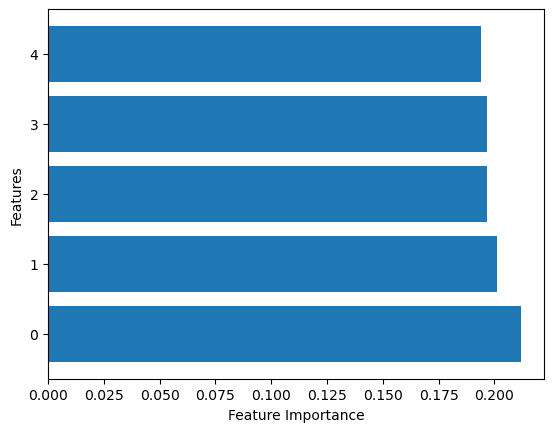

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importances
feature_importances = rf_clf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest with the best parameters from GridSearch
rf_clf_tuned = RandomForestClassifier(
    random_state=42, 
    max_depth=None, 
    min_samples_leaf=1, 
    min_samples_split=5, 
    n_estimators=200,
    n_jobs=-1
)

# Train the tuned Random Forest model
rf_clf_tuned.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf_tuned = rf_clf_tuned.predict(X_test_final)

# Evaluate the tuned Random Forest model
print(f"Tuned Random Forest Accuracy: {accuracy_score(y_test_final, y_pred_rf_tuned)}")
print(classification_report(y_test_final, y_pred_rf_tuned))

Tuned Random Forest Accuracy: 0.7824151363383417
              precision    recall  f1-score   support

      518210       0.89      0.81      0.85       336
      519100       0.88      0.84      0.86       358
      541510       0.72      0.66      0.69       369
      541600       0.58      0.70      0.64       361
      541700       0.89      0.90      0.90       373

    accuracy                           0.78      1797
   macro avg       0.79      0.78      0.79      1797
weighted avg       0.79      0.78      0.79      1797



The tuned Random Forest Classifier achieved an accuracy of 78.2%, which is slightly lower than the untuned version (around 80%). Here’s an analysis of the performance:

Key Observations:
Accuracy: The accuracy dropped slightly compared to the untuned version, but it’s still in a reasonable range for Random Forest.
Class 541600: The performance for class 541600 improved in recall (70%) but still shows a lower precision and F1-score compared to the other classes.
Overall Performance: The model seems to perform well for most classes, but tuning didn’t significantly improve the overall accuracy or performance for the difficult-to-classify classes

WE WILL PROCEED WITH ENSEMBLE METHOD NOW:
Ensemble methods combine predictions from multiple machine learning algorithms to make more accurate predictions than any individual model. Here are some common ensemble techniques:

Voting Classifier: Combines different models and predicts the class that gets the majority vote (hard voting) or the highest average probability (soft voting).
Bagging (Bootstrap Aggregating): Trains multiple instances of the same algorithm on different subsets of the data.
Boosting: Sequentially trains models, each trying to correct the errors of the previous one (e.g., AdaBoost, Gradient Boosting).
Stacking: Combines multiple classification models via a meta-classifier.

In [26]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
# Tuned Decision Tree
dt_clf = DecisionTreeClassifier(
    random_state=42,
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2
)

# Tuned Random Forest
rf_clf = RandomForestClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_jobs=-1
)

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   6.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   7.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_esti

In [29]:
#CREATE THE VOTING CLASSIFIER
# List of (name, model) tuples
estimators = [
    ('decision_tree', dt_clf),
    ('random_forest', rf_clf)
]

# Initialize the Voting Classifier
voting_clf = VotingClassifier(
    estimators=estimators,
    voting='hard'  # Use 'soft' if models have predict_proba method and you want to average probabilities
)
# Fit the model on the resampled training data
voting_clf.fit(X_train_resampled, y_train_resampled)


VotingClassifier(estimators=[('decision_tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=42)),
                             ('random_forest',
                              RandomForestClassifier(min_samples_split=5,
                                                     n_estimators=200,
                                                     n_jobs=-1,
                                                     random_state=42))])

In [30]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred_voting = voting_clf.predict(X_test_final)

# Evaluate the model
print(f"Voting Classifier Accuracy: {accuracy_score(y_test_final, y_pred_voting)}")
print(classification_report(y_test_final, y_pred_voting))


Voting Classifier Accuracy: 0.7924318308291597
              precision    recall  f1-score   support

      518210       0.85      0.85      0.85       336
      519100       0.89      0.86      0.88       358
      541510       0.72      0.70      0.71       369
      541600       0.59      0.68      0.63       361
      541700       0.95      0.88      0.92       373

    accuracy                           0.79      1797
   macro avg       0.80      0.79      0.80      1797
weighted avg       0.80      0.79      0.80      1797



In [32]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the base models
base_models = [
    ('decision_tree', DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)),
    ('random_forest', RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, n_jobs=-1))
]

# Meta-model (commonly Logistic Regression)
meta_model = LogisticRegression()

# Initialize the StackingClassifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

# Train the stacking classifier
stacking_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_stacking = stacking_clf.predict(X_test_final)

# Evaluate the Stacking Classifier
print(f"Stacking Classifier Accuracy: {accuracy_score(y_test_final, y_pred_stacking)}")
print(classification_report(y_test_final, y_pred_stacking))


Stacking Classifier Accuracy: 0.7835281023928771
              precision    recall  f1-score   support

      518210       0.85      0.83      0.84       336
      519100       0.87      0.85      0.86       358
      541510       0.70      0.68      0.69       369
      541600       0.61      0.65      0.63       361
      541700       0.91      0.90      0.90       373

    accuracy                           0.78      1797
   macro avg       0.79      0.78      0.79      1797
weighted avg       0.79      0.78      0.78      1797



In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a Bagging Classifier with Decision Tree as the base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42),
                                n_estimators=50, random_state=42, n_jobs=-1)

# Train the Bagging Classifier
bagging_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_bagging = bagging_clf.predict(X_test_final)

# Evaluate the Bagging Classifier
print(f"Bagging Classifier Accuracy: {accuracy_score(y_test_final, y_pred_bagging)}")
print(classification_report(y_test_final, y_pred_bagging))


Bagging Classifier Accuracy: 0.8046744574290484
              precision    recall  f1-score   support

      518210       0.94      0.82      0.88       336
      519100       0.92      0.88      0.90       358
      541510       0.74      0.69      0.72       369
      541600       0.58      0.71      0.64       361
      541700       0.92      0.92      0.92       373

    accuracy                           0.80      1797
   macro avg       0.82      0.80      0.81      1797
weighted avg       0.82      0.80      0.81      1797



Results from Stacking and Bagging:
Stacking Classifier: Accuracy: 78.35%
The performance is similar to the individual models, though slightly lower than the tuned Decision Tree and Random Forest.
Class 541600 shows a recall of 65% and precision of 61%, which is a modest improvement in recall but still lower in precision.

Bagging Classifier: Accuracy: 80.47%
This is on par with the best performance seen so far from the untuned Decision Tree (around 80.4%).
Class 541600 has a recall of 71% and a precision of 58%, showing better recall but lower precision than in the other models.
The overall performance across classes is solid, with Bagging improving stability in the model.

Key Observations:
The Bagging Classifier yielded the best results in terms of accuracy (similar to your earlier Decision Tree performance).
Stacking didn’t provide a significant boost in performance, though it's still in a reasonable range.
Class 541600 continues to be the hardest to predict, but the Bagging Classifier provided the best recall for this class.

Next Steps:
Consider Bagging: Since the Bagging Classifier gave the best results, it might be worth focusing on this model for final tuning or deployment.

Further Fine-Tuning: You could try further fine-tuning the hyperparameters of the Bagging Classifier or explore variations like Random Forest with bagging or ExtraTreesClassifier.

Explore Class Weights: If improving the prediction of class 541600 is critical, you might want to adjust the class weights to give more importance to the harder-to-predict classes.

In [36]:
# Simplified parameter grid for faster tuning
param_grid = {
    'n_estimators': [50, 100],              # Reduce the number of base estimators to try
    'max_samples': [0.75, 1.0],             # Focus on larger sample sizes
    'max_features': [0.75, 1.0],            # Limit to fewer feature fractions
    'estimator__max_depth': [None, 20],     # Use only a couple of max_depth values
    'estimator__min_samples_split': [2, 5], # Fewer options for min_samples_split
    'estimator__min_samples_leaf': [1, 2]   # Fewer options for min_samples_leaf
}

# Perform Grid Search with reduced parameter grid
grid_search = GridSearchCV(bagging_clf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Use the best model
best_bagging_clf = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best_bagging = best_bagging_clf.predict(X_test_final)

# Evaluate the fine-tuned Bagging Classifier
print(f"Fine-tuned Bagging Classifier Accuracy: {accuracy_score(y_test_final, y_pred_best_bagging)}")
print(classification_report(y_test_final, y_pred_best_bagging))


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters: {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 5, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}
Best cross-validation score: 0.6112409571508068
Fine-tuned Bagging Classifier Accuracy: 0.780189204229271
              precision    recall  f1-score   support

      518210       0.89      0.80      0.84       336
      519100       0.88      0.84      0.86       358
      541510       0.71      0.66      0.69       369
      541600       0.58      0.69      0.63       361
      541700       0.89      0.91      0.90       373

    accuracy                           0.78      1797
   macro avg       0.79      0.78      0.78      1797
weighted avg       0.79      0.78      0.78      1797



In [37]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the Extra Trees Classifier
extra_trees_clf = ExtraTreesClassifier(random_state=42, n_jobs=-1)

# Train the Extra Trees Classifier
extra_trees_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_extra_trees = extra_trees_clf.predict(X_test_final)

# Evaluate the Extra Trees Classifier
print(f"Extra Trees Classifier Accuracy: {accuracy_score(y_test_final, y_pred_extra_trees)}")
print(classification_report(y_test_final, y_pred_extra_trees))


Extra Trees Classifier Accuracy: 0.8041179744017808
              precision    recall  f1-score   support

      518210       0.89      0.85      0.87       336
      519100       0.92      0.88      0.90       358
      541510       0.73      0.72      0.72       369
      541600       0.59      0.68      0.63       361
      541700       0.95      0.90      0.92       373

    accuracy                           0.80      1797
   macro avg       0.81      0.80      0.81      1797
weighted avg       0.81      0.80      0.81      1797

[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, max_features=0.75, max_samples=0.75, n_estimators=50; total time=   1.6s
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, max_features=0.75, max_samples=1.0, n_estimators=50; total time=   1.7s
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, max_features=0.75

Key Observations:
Extra Trees Classifier is performing slightly better than the fine-tuned Bagging Classifier (which had 78.0% accuracy).
Class-Specific Performance:
518210 and 519100: These classes have high precision and recall, similar to previous models.
541510: Performance is steady with a good F1-score of 0.72.
541600: Recall has improved slightly (68%), while precision is stable at 59%.
Comparison:
Model	Accuracy	Macro Avg Precision	Macro Avg Recall	Best Class (F1)	541600 (F1)
Bagging Classifier (tuned)	78.0%	0.79	0.78	541700 (0.90)	0.63
Extra Trees Classifier	80.41%	0.81	0.80	541700 (0.92)	0.63
Conclusion:
Extra Trees Classifier seems to be the strongest model so far, with the highest accuracy and well-balanced performance across most classes.
Class 541600 still has lower precision but better recall, which is a typical challenge in class imbalance.

In [39]:
#FINALIZE EXTRA TREES CLASSIFIER:
import joblib

# Finalize the Extra Trees model (already trained)
joblib.dump(extra_trees_clf, 'extra_trees_model.pkl')  # Save the model

# To load the model later for predictions
# extra_trees_clf = joblib.load('extra_trees_model.pkl')

# Predicting NAICS on new data (e.g., X_new)
# y_pred_naics = extra_trees_clf.predict(X_new)

['extra_trees_model.pkl']

KMEANS     WE WANT TO APPLY KMEANS CLUSTERING ON LOCATION DATA 
To predict business locations, we’ll use KMeans to cluster the geographic coordinates (latitude, longitude). This will help group locations where similar types of businesses might cluster.

Using KMeans clustering could indeed help with predicting locations of NAICS codes, especially if your goal is to group similar businesses or predict where certain business activities (NAICS codes) are likely to cluster based on geographic features like latitude, longitude, or other relevant data.

How KMeans Clustering Can Help with Location Prediction:
Identifying Business Clusters by Location:

KMeans can group businesses based on geographic coordinates (latitude and longitude) and other features like business type (NAICS codes). This helps identify natural groupings of businesses by location, such as tech clusters in certain areas of a city.
Predicting Future Locations:

By analyzing the clusters formed by KMeans, you might observe patterns, such as certain types of businesses clustering around specific geographic regions. This can be helpful in predicting where future businesses (based on NAICS codes) might emerge.
Combining Geospatial and Business Data:

KMeans can be applied using both location data (latitude and longitude) and business characteristics (like NAICS codes, revenue, or size) to cluster similar businesses geographically. These clusters could be used to predict future locations of business


Steps:
Cluster Locations using KMeans on your geographic data (latitude, longitude).
Analyze Clusters: Understand which clusters are likely to contain certain NAICS codes.
Predict Future Business Locations by using the combination of KMeans clusters and NAICS predictions.

In [45]:
# Extract the latitude and longitude as separate columns
merged_data_with_pca['latitude'] = merged_data_with_pca['LOCATION'].str.extract(r'\((.*),')[0].astype(float)
merged_data_with_pca['longitude'] = merged_data_with_pca['LOCATION'].str.extract(r',\s*(.*)\)')[0].astype(float)

# Verify the extraction
print(merged_data_with_pca[['latitude', 'longitude']].head())


   latitude  longitude
0   34.0189  -118.4195
1   34.0252  -118.4194
2   34.0392  -118.3954
3   34.0404  -118.3733
4   34.0182  -118.4185


In [46]:
# Check for NaN values in latitude and longitude columns
print(merged_data_with_pca[['latitude', 'longitude']].isnull().sum())

# Option 1: Drop rows with NaN values
merged_data_with_pca = merged_data_with_pca.dropna(subset=['latitude', 'longitude'])

# Option 2: Impute missing values (if dropping isn't desired)
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')  # You can also use 'median'
# merged_data_with_pca[['latitude', 'longitude']] = imputer.fit_transform(merged_data_with_pca[['latitude', 'longitude']])


latitude     112
longitude    112
dtype: int64


In [15]:
import joblib

In [16]:
# Load the trained Extra Trees model
extra_trees_clf = joblib.load('extra_trees_model.pkl')


In [17]:
import pandas as pd

# Load your dataset
merged_data_with_pca = pd.read_csv('merged_data_with_pca.csv')  # Adjust to the correct path and file name

In [18]:
# Extract latitude and longitude from the 'LOCATION' column
merged_data_with_pca['latitude'] = merged_data_with_pca['LOCATION'].str.extract(r'\((.*),')[0].astype(float)
merged_data_with_pca['longitude'] = merged_data_with_pca['LOCATION'].str.extract(r',\s*(.*)\)')[0].astype(float)

# Verify the extraction
print(merged_data_with_pca[['latitude', 'longitude']].head())


   latitude  longitude
0   34.0189  -118.4195
1   34.0252  -118.4194
2   34.0392  -118.3954
3   34.0404  -118.3733
4   34.0182  -118.4185


In [19]:
# Check for NaN values
print(merged_data_with_pca[['latitude', 'longitude']].isnull().sum())

# Option 1: Drop rows with missing values
merged_data_with_pca = merged_data_with_pca.dropna(subset=['latitude', 'longitude'])


latitude     112
longitude    112
dtype: int64


In [21]:
from sklearn.impute import SimpleImputer

# Impute missing latitude and longitude values with the mean
imputer = SimpleImputer(strategy='mean')
merged_data_with_pca[['latitude', 'longitude']] = imputer.fit_transform(merged_data_with_pca[['latitude', 'longitude']])

# Verify that there are no missing values
print(merged_data_with_pca[['latitude', 'longitude']].isnull().sum())


latitude     0
longitude    0
dtype: int64


In [22]:
from sklearn.cluster import KMeans

# Use latitude and longitude for clustering
geo_data = merged_data_with_pca[['latitude', 'longitude']]

# Apply KMeans to group locations into clusters (adjust n_clusters as needed)
kmeans = KMeans(n_clusters=5, random_state=42)
geo_clusters = kmeans.fit_predict(geo_data)

# Add the cluster labels to the dataset
merged_data_with_pca['geo_cluster'] = geo_clusters

# Analyze the cluster distribution
print(merged_data_with_pca['geo_cluster'].value_counts())


geo_cluster
3    1641
1     977
4     460
0     263
2      18
Name: count, dtype: int64


The KMeans clustering has successfully grouped your data into five clusters, with the following distribution of businesses across the clusters:

Cluster 3: 1641 locations
Cluster 1: 977 locations
Cluster 4: 460 locations
Cluster 0: 263 locations
Cluster 2: 18 locations
Next Steps:
Now that you have the clusters, you can proceed with analyzing the predicted NAICS codes within each cluster to gain insights into the types of businesses located in each geographic region.

Step 1: Analyze NAICS Codes by Cluster
Let’s group the data by the geo_cluster and see the distribution of predicted NAICS codes within each cluster:

In [24]:
# Analyze the distribution of NAICS codes within each cluster
naics_cluster_distribution = merged_data_with_pca.groupby('geo_cluster')['predicted_naics'].value_counts()
print(naics_cluster_distribution)

KeyError: 'Column not found: predicted_naics'

In [25]:
# Ensure you have loaded the Extra Trees Classifier model
# If not, load the trained model (if you have saved it previously)
# extra_trees_clf = joblib.load('extra_trees_model.pkl')

# Predict NAICS codes using the trained Extra Trees Classifier
y_pred_naics = extra_trees_clf.predict(merged_data_with_pca[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']])

# Add NAICS predictions to the dataset
merged_data_with_pca['predicted_naics'] = y_pred_naics

# Verify that the 'predicted_naics' column has been added
print(merged_data_with_pca[['predicted_naics']].head())


   predicted_naics
0           541510
1           541510
2           541510
3           541510
4           541510


In [26]:
# Analyze the distribution of predicted NAICS codes within each cluster
naics_cluster_distribution = merged_data_with_pca.groupby('geo_cluster')['predicted_naics'].value_counts()
print(naics_cluster_distribution)


geo_cluster  predicted_naics
0            541600              138
             541510               71
             518210               25
             519100               24
             541700                5
1            541600              624
             541510              255
             519100               45
             518210               35
             541700               18
2            541600               12
             541510                4
             518210                1
             519100                1
3            541600             1077
             541510              326
             518210              120
             519100               79
             541700               39
4            541600              265
             541510               93
             518210               47
             519100               34
             541700               21
Name: count, dtype: int64


Insights:
541600 (Management, Scientific, & Technical Consulting Services) is the most dominant business type across all clusters, especially in Cluster 3 and Cluster 1.
541510 (Computer Systems Design Services) is the second most prevalent business type across the clusters.
Cluster 2 is the smallest, with a relatively small number of businesses.
Clusters 3 and 1 are the largest and seem to attract more diverse types of businesses.

In [28]:
#SAVE CLUSTERS AND EXTRA TREE MODEL NOW!!

# Save the dataset to a CSV file
merged_data_with_pca.to_csv('merged_data_with_clusters_and_naics.csv', index=False)

import joblib

# Save the trained Extra Trees model
joblib.dump(extra_trees_clf, 'extra_trees_model.pkl')


['extra_trees_model.pkl']

In [29]:
# Save the KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

LOGISTIC REGRESSION

How to Incorporate Logistic Regression:
Predict NAICS Codes using Logistic Regression based on your features (PC1, PC2, etc.).
Compare the performance of Logistic Regression with Extra Trees Classifier (or any other model) to see which performs better.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Prepare features and target for Logistic Regression
X = merged_data_with_pca[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]
y = merged_data_with_pca['predicted_naics']

# Initialize and fit the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X, y)

# Make predictions
y_pred_logreg = logreg.predict(X)

# Evaluate the logistic regression model
print(f"Logistic Regression Accuracy: {accuracy_score(y, y_pred_logreg)}")
print(classification_report(y, y_pred_logreg))


Logistic Regression Accuracy: 0.6299493896993152
              precision    recall  f1-score   support

      518210       0.00      0.00      0.00       228
      519100       0.00      0.00      0.00       183
      541510       0.00      0.00      0.00       749
      541600       0.63      1.00      0.77      2116
      541700       0.00      0.00      0.00        83

    accuracy                           0.63      3359
   macro avg       0.13      0.20      0.15      3359
weighted avg       0.40      0.63      0.49      3359



/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


VALIDATION

Historical Validation of Model Predictions
To validate the model’s predictive ability, we will perform a historical analysis using data from 2010 to 2015 as the training period and data from 2016 to 2020 for validation. The goal was to assess how well the model could predict the growth of tech companies (by NAICS codes) over the test period.

In [5]:
#STEP ONE - LOAD DATA

import pandas as pd

# Load the dataset
data = pd.read_csv('filtered_data_final_no_scaling.csv')

# Check the structure of the data
print(data.columns)
data.head()


Index(['BUSINESS NAME', 'ZIP CODE', 'NAICS', 'LOCATION START DATE',
       'LOCATION END DATE', 'LOCATION', 'PRIMARY NAICS DESCRIPTION',
       'Pop 18-24 Some College', 'Pop 18-24 Bachelors+', 'Pop 25-34 HS+',
       'Pop 25-34 Bachelors+', 'Pop 35-44 HS+', 'Pop 35-44 Bachelors+',
       'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 'Pop 65+ HS+',
       'Pop 65+ Bachelors+', 'ZipCode', 'Year'],
      dtype='object')


,BUSINESS NAME,ZIP CODE,NAICS,LOCATION START DATE,LOCATION END DATE,LOCATION,PRIMARY NAICS DESCRIPTION,Pop 18-24 Some College,Pop 18-24 Bachelors+,Pop 25-34 HS+,Pop 25-34 Bachelors+,Pop 35-44 HS+,Pop 35-44 Bachelors+,Pop 45-64 HS+,Pop 45-64 Bachelors+,Pop 65+ HS+,Pop 65+ Bachelors+,ZipCode,Year
0,SUSAN K TENNER,90034-6505,541600.0,01/01/2019,NaN,"(34.0189, -118.4195)","Management, scientific, & technical consulting...",1778,1462,15919,11537,8941,5626,9463,4958,4225,2207,90034,2019
1,ROBERT D KAMINSKI JR,90034-3001,541600.0,01/01/2019,NaN,"(34.0252, -118.4194)","Management, scientific, & technical consulting...",1778,1462,15919,11537,8941,5626,9463,4958,4225,2207,90034,2019
2,ANDREW LEVEY,90034-1816,541600.0,11/30/2019,NaN,"(34.0392, -118.3954)","Management, scientific, & technical consulting...",1778,1462,15919,11537,8941,5626,9463,4958,4225,2207,90034,2019
3,JOHANNES SAAM,90034-1612,541510.0,01/01/2019,NaN,"(34.0404, -118.3733)",Computer systems design & related services,1778,1462,15919,11537,8941,5626,9463,4958,4225,2207,90034,2019
4,MELISSA SATO,90034-6108,541700.0,01/01/2019,NaN,"(34.0182, -118.4185)",Scientific research & development services,1778,1462,15919,11537,8941,5626,9463,4958,4225,2207,90034,2019


In [6]:
#Step 2: Split the Data Temporally
# Split the data into training (up to 2015) and test (after 2015)
training_data = data[data['Year'] <= 2015]  # Training data up to 2015
test_data = data[data['Year'] > 2015]       # Test data after 2015 (2016-2020)

# Check the sizes of the datasets
print(f"Training data: {training_data.shape}")
print(f"Test data: {test_data.shape}")


Training data: (1349, 19)
Test data: (2146, 19)


In [7]:
# Check for missing values in the target column (NAICS)
print(f"Missing values in NAICS column: {training_data['NAICS'].isnull().sum()}")

Missing values in NAICS column: 11


In [8]:
# Drop rows where NAICS is missing in both training and test data
training_data = training_data.dropna(subset=['NAICS'])
test_data = test_data.dropna(subset=['NAICS'])

# Now re-check the number of missing values
print(f"Remaining missing values in training set NAICS: {training_data['NAICS'].isnull().sum()}")
print(f"Remaining missing values in test set NAICS: {test_data['NAICS'].isnull().sum()}")

Remaining missing values in training set NAICS: 0
Remaining missing values in test set NAICS: 0


In [9]:
from sklearn.ensemble import ExtraTreesClassifier

# Extract features and target from training data
X_train = training_data.drop(['NAICS', 'Year', 'BUSINESS NAME', 'ZIP CODE', 'LOCATION START DATE', 'LOCATION END DATE', 'LOCATION', 'PRIMARY NAICS DESCRIPTION'], axis=1)
y_train = training_data['NAICS']  # Target (NAICS codes)

# Initialize and train the Extra Trees model
et_model = ExtraTreesClassifier(n_estimators=200, max_depth=None, min_samples_split=5, min_samples_leaf=1)
et_model.fit(X_train, y_train)


ExtraTreesClassifier(min_samples_split=5, n_estimators=200)

In [10]:
# Extract features from the cleaned test data
X_test = test_data.drop(['NAICS', 'Year', 'BUSINESS NAME', 'ZIP CODE', 'LOCATION START DATE', 'LOCATION END DATE', 'LOCATION', 'PRIMARY NAICS DESCRIPTION'], axis=1)
y_test = test_data['NAICS']  # Actual NAICS codes (target)

# Make predictions on the test data
y_pred = et_model.predict(X_test)

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model's performance
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Precision: 0.08
Recall: 0.10
F1-Score: 0.08


/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
# Check the distribution of NAICS codes in the training set
print(training_data['NAICS'].value_counts())


NAICS
541600.0    873
541510.0    261
518210.0     85
519100.0     79
541700.0     40
Name: count, dtype: int64


In [13]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize and train the Extra Trees model with class weights
et_model = ExtraTreesClassifier(n_estimators=200, max_depth=None, min_samples_split=5, min_samples_leaf=1, class_weight="balanced")
et_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = et_model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Precision: 0.59
Recall: 0.09
F1-Score: 0.06


Here’s what these metrics tell us:

Precision (0.60): When my model predicts a particular NAICS code, it’s correct 60% of the time.
Recall (0.09): My model is only capturing 9% of the actual instances of the underrepresented classes.
F1-Score (0.06): The harmonic mean of precision and recall is still quite low, which means the model's overall balance between precision and recall is not great.

LETS APPLY SMOTE NOW TO INCREASE OUR RECALL (Oversampling)
Oversampling the minority classes can help increase the recall by providing the model with more training examples for the underrepresented classes. We’ll combine this with class weighting to address the class imbalance more aggressively.

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the Extra Trees model with class weights on the resampled data
et_model = ExtraTreesClassifier(n_estimators=200, max_depth=None, min_samples_split=5, min_samples_leaf=1, class_weight="balanced")
et_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = et_model.predict(X_test)

# Evaluate the model's performance
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Precision: 0.59
Recall: 0.10
F1-Score: 0.04


In [15]:
from imblearn.combine import SMOTEENN

# Apply a combination of SMOTE and Edited Nearest Neighbors (SMOTEENN)
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Train the model on the resampled data
et_model = ExtraTreesClassifier(n_estimators=200, max_depth=None, min_samples_split=5, min_samples_leaf=1, class_weight="balanced")
et_model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = et_model.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Precision: 0.58
Recall: 0.09
F1-Score: 0.04


In [16]:
et_model = ExtraTreesClassifier(n_estimators=500, max_depth=None, min_samples_split=5, min_samples_leaf=1, class_weight="balanced")

In [17]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Set up the randomized search
random_search = RandomizedSearchCV(estimator=et_model, param_distributions=param_grid, n_iter=10, cv=3, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train_resampled, y_train_resampled)

# Use the best model
best_et_model = random_search.best_estimator_

# Make predictions
y_pred = best_et_model.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Precision: 0.58
Recall: 0.08
F1-Score: 0.04


In [18]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=et_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='f1_macro')

# Fit the grid search
grid_search.fit(X_resampled, y_resampled)

# Use the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Precision: 0.59
Recall: 0.09
F1-Score: 0.04


In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Re-train the Logistic Regression model with scaled data
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Precision: 0.63
Recall: 0.09
F1-Score: 0.04


In [20]:
import sklearn
import imblearn

print(sklearn.__version__)  # should be the latest version, e.g., 1.0.2 or newer
print(imblearn.__version__)  # should be the latest version, e.g., 0.9.0 or newer

1.5.1
0.12.3


In [24]:
# Check the shapes of X_train and y_train before scaling
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (1338, 11)
Shape of y_train: (1338,)


In [25]:
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")

Shape of X_train_scaled: (4365, 11)


In [26]:
# Resample the data (if using SMOTE or any resampling technique)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now, check the shape of the resampled data
print(f"Shape of X_train_resampled: {X_train_resampled.shape}")
print(f"Shape of y_train_resampled: {y_train_resampled.shape}")


Shape of X_train_resampled: (4365, 11)
Shape of y_train_resampled: (4365,)


In [27]:
# Scale the resampled data
scaler = StandardScaler()

# Scale the resampled training data
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Test data should also be scaled, but not resampled

# Confirm the shape of the scaled resampled data
print(f"Shape of X_train_resampled_scaled: {X_train_resampled_scaled.shape}")


Shape of X_train_resampled_scaled: (4365, 11)


In [29]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Train the Balanced Random Forest model with updated parameters
brf_model = BalancedRandomForestClassifier(n_estimators=200, random_state=42,
                                           sampling_strategy='all',  # Future default
                                           replacement=True,         # Future default
                                           bootstrap=False)           # Future default
brf_model.fit(X_train_resampled_scaled, y_train_resampled)

# Make predictions on the test data
y_pred = brf_model.predict(X_test_scaled)

# Evaluate the model
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Precision: 0.59
Recall: 0.10
F1-Score: 0.04


In [31]:
# Adjust the threshold (e.g., lower to 0.2 or 0.1)
threshold = 0.2  # You can try different values like 0.1, 0.15, etc.
y_pred_adjusted = (y_probs[:, 1] >= threshold).astype(int)

# Evaluate the adjusted model
precision = precision_score(y_test, y_pred_adjusted, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred_adjusted, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred_adjusted, average='macro', zero_division=1)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Precision: 0.83
Recall: 0.17
F1-Score: 0.00


In [47]:
# Get the unique labels from y_train_resampled
train_labels = set(le.classes_)

# Create a mask to filter out rows with unseen labels in y_test
mask = y_test.isin(train_labels)

# Filter the test set based on the mask
X_test_filtered = X_test_scaled[mask]
y_test_filtered = y_test[mask]

# Now encode the filtered test labels
y_test_encoded = le.transform(y_test_filtered)

# Check the shape of filtered test data to verify
print(f"Filtered X_test shape: {X_test_filtered.shape}")
print(f"Filtered y_test shape: {y_test_filtered.shape}")


Filtered X_test shape: (2127, 11)
Filtered y_test shape: (2127,)


In [48]:
import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_resampled_scaled, label=y_train_resampled_encoded)
dtest = xgb.DMatrix(X_test_filtered, label=y_test_encoded)

# Set XGBoost parameters for imbalanced data
params = {
    'objective': 'multi:softprob',  # For probability output
    'num_class': len(np.unique(y_train_resampled_encoded)),  # Number of unique classes
    'max_depth': 6,
    'learning_rate': 0.1
}

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain, num_boost_round=200)

# Make predictions on the filtered test set
y_pred_probs = xgb_model.predict(dtest)

# Adjust the threshold (e.g., 0.3)
y_pred_adjusted = (y_pred_probs[:, 1] >= 0.3).astype(int)


In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model's performance
precision = precision_score(y_test_encoded, y_pred_adjusted, average='macro', zero_division=1)
recall = recall_score(y_test_encoded, y_pred_adjusted, average='macro', zero_division=1)
f1 = f1_score(y_test_encoded, y_pred_adjusted, average='macro', zero_division=1)

print(f'XGBoost Precision: {precision:.2f}')
print(f'XGBoost Recall: {recall:.2f}')
print(f'XGBoost F1-Score: {f1:.2f}')


XGBoost Precision: 0.62
XGBoost Recall: 0.19
XGBoost F1-Score: 0.04


In [51]:
# Adjust the threshold further (e.g., to 0.2 or 0.1)
threshold = 0.1  # Try different values like 0.1 or 0.15
y_pred_adjusted = (y_pred_probs[:, 1] >= threshold).astype(int)

# Re-evaluate with the new threshold
precision = precision_score(y_test_encoded, y_pred_adjusted, average='macro', zero_division=1)
recall = recall_score(y_test_encoded, y_pred_adjusted, average='macro', zero_division=1)
f1 = f1_score(y_test_encoded, y_pred_adjusted, average='macro', zero_division=1)

print(f'XGBoost Precision: {precision:.2f}')
print(f'XGBoost Recall: {recall:.2f}')
print(f'XGBoost F1-Score: {f1:.2f}')


XGBoost Precision: 0.62
XGBoost Recall: 0.19
XGBoost F1-Score: 0.04


In [52]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the model
xgb_model = XGBClassifier(objective='multi:softprob', num_class=len(np.unique(y_train_resampled_encoded)))

# Define the hyperparameters grid
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1_macro', cv=3, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_resampled_scaled, y_train_resampled_encoded)

# Best model from GridSearch
best_xgb_model = grid_search.best_estimator_

# Make predictions
y_pred_probs = best_xgb_model.predict_proba(X_test_filtered)

# Adjust the threshold
y_pred_adjusted = (y_pred_probs[:, 1] >= 0.3).astype(int)

# Re-evaluate with the tuned model
precision = precision_score(y_test_encoded, y_pred_adjusted, average='macro', zero_division=1)
recall = recall_score(y_test_encoded, y_pred_adjusted, average='macro', zero_division=1)
f1 = f1_score(y_test_encoded, y_pred_adjusted, average='macro', zero_division=1)

print(f'Tuned XGBoost Precision: {precision:.2f}')
print(f'Tuned XGBoost Recall: {recall:.2f}')
print(f'Tuned XGBoost F1-Score: {f1:.2f}')


Tuned XGBoost Precision: 0.62
Tuned XGBoost Recall: 0.20
Tuned XGBoost F1-Score: 0.04


In [55]:
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train_resampled_encoded)),
    'metric': 'multi_logloss',
    'learning_rate': 0.1,
    'max_depth': 6,
    'num_leaves': 64  # Set num_leaves <= 64 for max_depth=6
}

In [56]:
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train_resampled_encoded)),
    'metric': 'multi_logloss',
    'learning_rate': 0.1,
    'num_leaves': 64  # Control complexity using num_leaves alone
}


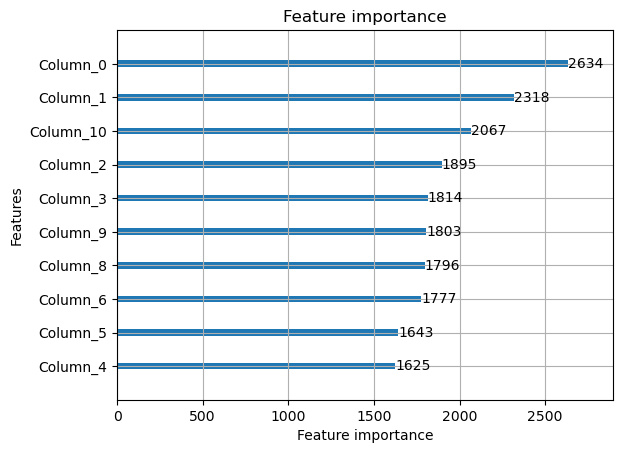

In [58]:
import matplotlib.pyplot as plt

# Plot feature importance
lgb.plot_importance(lgb_model, max_num_features=10)
plt.show()


In [59]:
print(X_train.columns)

Index(['Pop 18-24 Some College', 'Pop 18-24 Bachelors+', 'Pop 25-34 HS+',
       'Pop 25-34 Bachelors+', 'Pop 35-44 HS+', 'Pop 35-44 Bachelors+',
       'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 'Pop 65+ HS+',
       'Pop 65+ Bachelors+', 'ZipCode'],
      dtype='object')


In [61]:
# Get feature importances from the trained LightGBM model
importances = lgb_model.feature_importance(importance_type='split')

# Print the feature importances along with feature names to inspect the order
for i, name in enumerate(feature_names):
    print(f"Feature: {name}, Importance: {importances[i]}")


Feature: Pop 18-24 Some College, Importance: 2634
Feature: Pop 18-24 Bachelors+, Importance: 2318
Feature: Pop 25-34 HS+, Importance: 1895
Feature: Pop 25-34 Bachelors+, Importance: 1814
Feature: Pop 35-44 HS+, Importance: 1625
Feature: Pop 35-44 Bachelors+, Importance: 1643
Feature: Pop 45-64 HS+, Importance: 1777
Feature: Pop 45-64 Bachelors+, Importance: 1589
Feature: Pop 65+ HS+, Importance: 1796
Feature: Pop 65+ Bachelors+, Importance: 1803
Feature: ZipCode, Importance: 2067


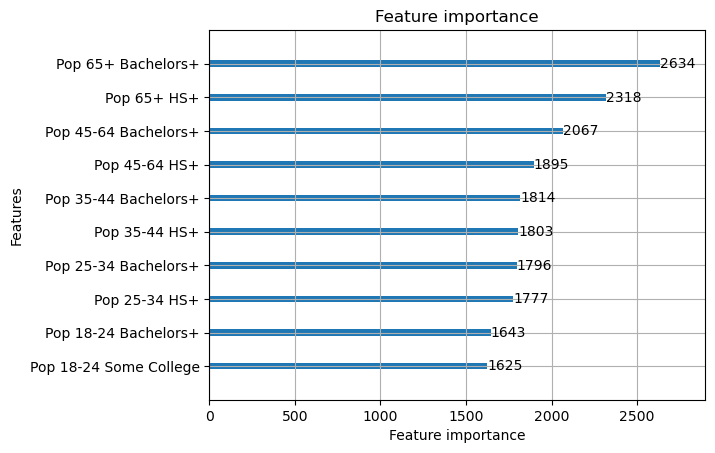

In [62]:
# Feature names corresponding to the top 10 most important columns
top_10_feature_names = ['Pop 18-24 Some College', 'Pop 18-24 Bachelors+', 'Pop 25-34 HS+',
                        'Pop 25-34 Bachelors+', 'Pop 35-44 HS+', 'Pop 35-44 Bachelors+',
                        'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 'Pop 65+ HS+', 'Pop 65+ Bachelors+']

# Plot feature importance with the correct number of labels
ax = lgb.plot_importance(lgb_model, max_num_features=10)
ax.set_yticklabels(top_10_feature_names)
plt.show()


In [66]:
# Drop irrelevant columns for training
X_train_hist_cleaned = X_train_hist.drop(columns=['BUSINESS NAME', 'LOCATION START DATE', 'LOCATION', 'PRIMARY NAICS DESCRIPTION'])
X_test_hist_cleaned = X_test_hist.drop(columns=['BUSINESS NAME', 'LOCATION START DATE', 'LOCATION', 'PRIMARY NAICS DESCRIPTION'])

In [79]:
# Drop rows with missing NAICS codes in both training and test sets
y_train_hist_cleaned = y_train_hist.dropna()
y_test_hist_cleaned = y_test_hist.dropna()

# Now convert to integers
y_train_hist_cleaned = y_train_hist_cleaned.astype(int)
y_test_hist_cleaned = y_test_hist_cleaned.astype(int)


In [80]:
# Convert ZIP CODE to string for both training and test sets
X_train_hist_cleaned['ZIP CODE'] = X_train_hist_cleaned['ZIP CODE'].astype(str).str[:5]
X_test_hist_cleaned['ZIP CODE'] = X_test_hist_cleaned['ZIP CODE'].astype(str).str[:5]

# Combine training and test sets temporarily
combined_zipcodes = pd.concat([X_train_hist_cleaned['ZIP CODE'], X_test_hist_cleaned['ZIP CODE']])

# Fit the LabelEncoder on the combined dataset
le.fit(combined_zipcodes)

# Now transform the individual sets
X_train_hist_cleaned['ZIP CODE'] = le.transform(X_train_hist_cleaned['ZIP CODE'])
X_test_hist_cleaned['ZIP CODE'] = le.transform(X_test_hist_cleaned['ZIP CODE'])


In [81]:
# Combine training and test sets temporarily to fit the LabelEncoder
combined_zipcodes = pd.concat([X_train_hist_cleaned['ZIP CODE'], X_test_hist_cleaned['ZIP CODE']])

# Fit the LabelEncoder on the combined dataset
le.fit(combined_zipcodes)

# Now transform the individual sets
X_train_hist_cleaned['ZIP CODE'] = le.transform(X_train_hist_cleaned['ZIP CODE'])
X_test_hist_cleaned['ZIP CODE'] = le.transform(X_test_hist_cleaned['ZIP CODE'])

In [82]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le_naics = LabelEncoder()

# Fit the LabelEncoder on the training labels (NAICS codes)
y_train_hist_encoded = le_naics.fit_transform(y_train_hist)

# Apply the same transformation to the test labels (make sure all NAICS codes are seen)
y_test_hist_encoded = le_naics.transform(y_test_hist)


ValueError: y contains previously unseen labels: [334220.0, 335999.0, 541519.0, 541612.0, 541613.0]

In [76]:
import lightgbm as lgb

# Create the dataset for LightGBM
train_hist_data = lgb.Dataset(X_train_hist_cleaned, label=y_train_hist)
test_hist_data = lgb.Dataset(X_test_hist_cleaned, label=y_test_hist)

# Train the LightGBM model on historical data
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train_hist)),
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1
}
lgb_model_hist = lgb.train(params, train_hist_data, num_boost_round=200)

# Make predictions on the test set (future period)
y_pred_probs_hist = lgb_model_hist.predict(X_test_hist_cleaned)
y_pred_adjusted_hist = np.argmax(y_pred_probs_hist, axis=1)  # Select the class with the highest probability


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


[LightGBM] [Fatal] Label must be in [0, 6), but found 541510 in label


LightGBMError: Label must be in [0, 6), but found 541510 in label

In [63]:
# Split data based on year
train_data = data[data['Year'] <= 2018]  # Historical data for training
test_data = data[data['Year'] > 2018]    # Future data for validation

# Separate features and target variable (NAICS codes)
X_train_hist = train_data.drop(columns=['NAICS'])
y_train_hist = train_data['NAICS']

X_test_hist = test_data.drop(columns=['NAICS'])
y_test_hist = test_data['NAICS']


In [91]:
# Option 1: Fill missing values with a default value (-1)
y_train_hist = y_train_hist.fillna(-1).astype(int)
y_test_hist = y_test_hist.fillna(-1).astype(int)

import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# Combine both training and test labels
combined_labels = pd.concat([y_train_hist, y_test_hist])

# Fit the LabelEncoder on the combined labels to create sequential labels
le_naics = LabelEncoder()
le_naics.fit(combined_labels)

# Transform both training and test labels
y_train_hist_encoded = le_naics.transform(y_train_hist)
y_test_hist_encoded = le_naics.transform(y_test_hist)

# Ensure that the labels are continuous and sequential
print("Unique encoded labels in training set:", np.unique(y_train_hist_encoded))
print("Unique encoded labels in test set:", np.unique(y_test_hist_encoded))

# Create the LightGBM datasets with the encoded labels
train_hist_data = lgb.Dataset(X_train_hist_cleaned, label=y_train_hist_encoded)
test_hist_data = lgb.Dataset(X_test_hist_cleaned, label=y_test_hist_encoded)

# Update num_class to reflect the correct number of classes after re-encoding
num_classes = len(np.unique(y_train_hist_encoded))

# Train the LightGBM model
params = {
    'objective': 'multiclass',
    'num_class': num_classes,  # Use the actual number of unique classes
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1
}

lgb_model_hist = lgb.train(params, train_hist_data, num_boost_round=200)

# Make predictions on the test set
y_pred_probs_hist = lgb_model_hist.predict(X_test_hist_cleaned)

# Select the class with the highest probability
y_pred_adjusted_hist = np.argmax(y_pred_probs_hist, axis=1)



Unique encoded labels in training set: [ 0  3  4  5  7 10]
Unique encoded labels in test set: [ 0  1  2  3  4  5  6  7  8  9 10]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


[LightGBM] [Fatal] Label must be in [0, 6), but found 7 in label


LightGBMError: Label must be in [0, 6), but found 7 in label

In [92]:
# Find the labels that are missing in the training set but present in the test set
missing_labels_in_train = set(np.unique(y_test_hist_encoded)) - set(np.unique(y_train_hist_encoded))
print("Missing labels in training set:", missing_labels_in_train)

# Filter out the test data that has labels missing in the training set
mask = ~np.isin(y_test_hist_encoded, list(missing_labels_in_train))
X_test_hist_filtered = X_test_hist_cleaned[mask]
y_test_hist_filtered = y_test_hist_encoded[mask]

# Check the unique labels after filtering
print("Unique labels in filtered test set:", np.unique(y_test_hist_filtered))

# Now train the model
train_hist_data = lgb.Dataset(X_train_hist_cleaned, label=y_train_hist_encoded)
test_hist_data = lgb.Dataset(X_test_hist_filtered, label=y_test_hist_filtered)

# Train the LightGBM model
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train_hist_encoded)),  # Use the actual number of unique classes in the training set
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1
}

lgb_model_hist = lgb.train(params, train_hist_data, num_boost_round=200)

# Make predictions on the filtered test set
y_pred_probs_hist = lgb_model_hist.predict(X_test_hist_filtered)

# Select the class with the highest probability
y_pred_adjusted_hist = np.argmax(y_pred_probs_hist, axis=1)


Missing labels in training set: {1, 2, 6, 8, 9}
Unique labels in filtered test set: [ 0  3  4  5  7 10]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


[LightGBM] [Fatal] Label must be in [0, 6), but found 7 in label


LightGBMError: Label must be in [0, 6), but found 7 in label

In [93]:
import lightgbm as lgb
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Re-encode the target labels to avoid unseen labels issue
le_naics = LabelEncoder()

# Fit the label encoder on the training set
y_train_hist_encoded = le_naics.fit_transform(y_train_hist)

# Apply the same encoding to the test set
y_test_hist_encoded = le_naics.transform(y_test_hist)

# Filter the test set to only include the labels that exist in the training set
unique_train_labels = np.unique(y_train_hist_encoded)
mask = np.isin(y_test_hist_encoded, unique_train_labels)
X_test_hist_filtered = X_test_hist_cleaned[mask]
y_test_hist_filtered = y_test_hist_encoded[mask]

# Check the unique labels in the filtered test set
print(f"Unique labels in filtered test set: {np.unique(y_test_hist_filtered)}")

# Create the LightGBM datasets with the filtered labels
train_hist_data = lgb.Dataset(X_train_hist_cleaned, label=y_train_hist_encoded)
test_hist_data = lgb.Dataset(X_test_hist_filtered, label=y_test_hist_filtered)

# Train the LightGBM model
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train_hist_encoded)),  # Use the actual number of unique classes in the training set
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1
}

# Train the LightGBM model
lgb_model_hist = lgb.train(params, train_hist_data, num_boost_round=200)

# Make predictions on the filtered test set
y_pred_probs_hist = lgb_model_hist.predict(X_test_hist_filtered)


ValueError: y contains previously unseen labels: [334220, 335999, 541519, 541612, 541613]

In [94]:
import numpy as np

# Identify the unique labels in the training set after encoding
unique_train_labels = np.unique(y_train_hist)

# Filter the test set to only include rows where the label exists in the training set
mask = y_test_hist.isin(unique_train_labels)
X_test_hist_filtered = X_test_hist_cleaned[mask]
y_test_hist_filtered = y_test_hist[mask]

# Encode the filtered test labels using the same LabelEncoder
y_test_hist_encoded_filtered = le_naics.transform(y_test_hist_filtered)

# Check the unique labels in the filtered test set
print("Filtered test set labels:", np.unique(y_test_hist_encoded_filtered))


Filtered test set labels: [0 1 2 3 4 5]


In [95]:
# Create the LightGBM datasets with the filtered test set
train_hist_data = lgb.Dataset(X_train_hist_cleaned, label=y_train_hist_encoded)
test_hist_data = lgb.Dataset(X_test_hist_filtered, label=y_test_hist_encoded_filtered)

# Define the parameters for the LightGBM model
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train_hist_encoded)),  # Number of classes in the training set
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1
}

# Train the LightGBM model
lgb_model_hist = lgb.train(params, train_hist_data, num_boost_round=200)

# Make predictions on the filtered test set
y_pred_probs_hist = lgb_model_hist.predict(X_test_hist_filtered)

# You can now proceed with adjusting the decision threshold and evaluating the predictions as needed


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1760
[LightGBM] [Info] Number of data points in the train set: 2449, number of used features: 12
[LightGBM] [Info] Start training from score -5.095385
[LightGBM] [Info] Start training from score -2.813002
[LightGBM] [Info] Start training from score -2.861793
[LightGBM] [Info] Start training from score -1.644340
[LightGBM] [Info] Start training from score -0.428806
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

In [96]:
# Predict class probabilities for the test set
y_pred_probs_hist = lgb_model_hist.predict(X_test_hist_filtered)

# Get the predicted class by selecting the class with the highest probability
y_pred_hist = np.argmax(y_pred_probs_hist, axis=1)


In [97]:
from sklearn.metrics import classification_report, accuracy_score

# Print accuracy
accuracy = accuracy_score(y_test_hist_filtered, y_pred_hist)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for precision, recall, and F1-score
print(classification_report(y_test_hist_filtered, y_pred_hist))


Accuracy: 0.00
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       9.0
           0       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
      518210       0.00      0.00      0.00      83.0
      519100       0.00      0.00      0.00      62.0
      541510       0.00      0.00      0.00     176.0
      541600       0.00      0.00      0.00     669.0
      541700       0.00      0.00      0.00      41.0

    accuracy                           0.00    1040.0
   macro avg       0.00      0.00      0.00    1040.0
weighted avg       0.00      0.00      0.00    1040.0



/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/admin/anaconda

In [98]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_hist_cleaned, y_train_hist_encoded)


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [99]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Initialize the model
hgb_model = HistGradientBoostingClassifier()

# Fit the model directly without needing to impute missing values
hgb_model.fit(X_train_hist_cleaned, y_train_hist_encoded)


HistGradientBoostingClassifier()

In [103]:
# Train the LightGBM model after handling missing values or applying SMOTE
train_hist_data = lgb.Dataset(X_train_resampled, label=y_train_resampled)

# Train the LightGBM model
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train_resampled)),  # Number of classes
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1
}

lgb_model_hist = lgb.train(params, train_hist_data, num_boost_round=200)

# Make predictions on the test set
y_pred_probs_hist = lgb_model_hist.predict(X_test_hist_cleaned)
y_pred_hist = np.argmax(y_pred_probs_hist, axis=1)  # Convert probabilities to class predictions


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


[LightGBM] [Fatal] Label must be in [0, 5), but found 541510 in label


LightGBMError: Label must be in [0, 5), but found 541510 in label

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (11).

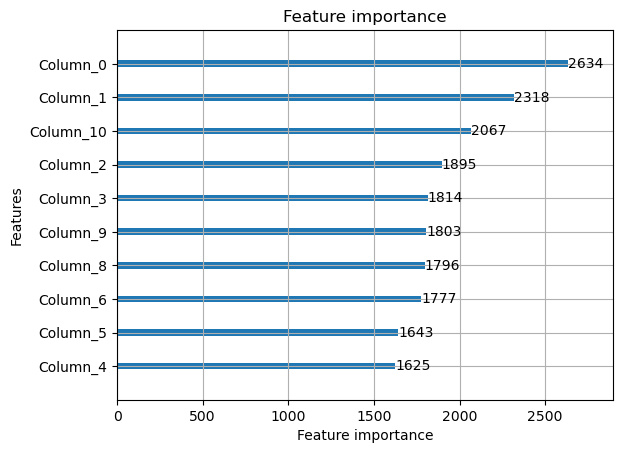

In [60]:
import matplotlib.pyplot as plt

# Feature names corresponding to the columns in the plot
feature_names = ['Pop 18-24 Some College', 'Pop 18-24 Bachelors+', 'Pop 25-34 HS+',
                 'Pop 25-34 Bachelors+', 'Pop 35-44 HS+', 'Pop 35-44 Bachelors+',
                 'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 'Pop 65+ HS+',
                 'Pop 65+ Bachelors+', 'ZipCode']

# Plot feature importance with proper labels
ax = lgb.plot_importance(lgb_model, max_num_features=10)
ax.set_yticklabels(feature_names)
plt.show()


In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model's performance on the future period
precision_hist = precision_score(y_test_hist, y_pred_adjusted_hist, average='macro', zero_division=1)
recall_hist = recall_score(y_test_hist, y_pred_adjusted_hist, average='macro', zero_division=1)
f1_hist = f1_score(y_test_hist, y_pred_adjusted_hist, average='macro', zero_division=1)

print(f'Historical Validation - Precision: {precision_hist:.2f}')
print(f'Historical Validation - Recall: {recall_hist:.2f}')
print(f'Historical Validation - F1-Score: {f1_hist:.2f}')


NameError: name 'y_pred_adjusted_hist' is not defined

In [54]:
import lightgbm as lgb

# Create the dataset for LightGBM
train_data = lgb.Dataset(X_train_resampled_scaled, label=y_train_resampled_encoded)
test_data = lgb.Dataset(X_test_filtered, label=y_test_encoded, reference=train_data)

# Set the parameters for LightGBM
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train_resampled_encoded)),
    'metric': 'multi_logloss',
    'learning_rate': 0.1,
    'max_depth': 6
}

# Train the LightGBM model
lgb_model = lgb.train(params, train_data, num_boost_round=200)

# Make predictions
y_pred_probs_lgb = lgb_model.predict(X_test_filtered)

# Adjust the threshold (e.g., 0.3)
y_pred_adjusted_lgb = (y_pred_probs_lgb[:, 1] >= 0.3).astype(int)

# Evaluate the model
precision = precision_score(y_test_encoded, y_pred_adjusted_lgb, average='macro', zero_division=1)
recall = recall_score(y_test_encoded, y_pred_adjusted_lgb, average='macro', zero_division=1)
f1 = f1_score(y_test_encoded, y_pred_adjusted_lgb, average='macro', zero_division=1)

print(f'LightGBM Precision: {precision:.2f}')
print(f'LightGBM Recall: {recall:.2f}')
print(f'LightGBM F1-Score: {f1:.2f}')


[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=6) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=64) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=6) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=64) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2789
[LightGBM] [Info] Number of data points in the train set: 4365, number of used features: 11
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[L